<a href="https://colab.research.google.com/github/swarathesh/Sound_Classification_ML_VS_DL/blob/master/Deep_Learning_For_Audio_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install tensorflow-gpu==1.15

     |████████████████████████████████| 411.5MB 41kB/s 
     |████████████████████████████████| 512kB 28.5MB/s 
     |████████████████████████████████| 3.8MB 34.4MB/s 
ERROR: tensorflow 2.2.0rc2 has requirement gast==0.3.3, but you'll have gast 0.2.2 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorboard<2.3.0,>=2.2.0, but you'll have tensorboard 1.15.0 which is incompatible.
ERROR: tensorflow 2.2.0rc2 has requirement tensorflow-estimator<2.3.0,>=2.2.0rc0, but you'll have tensorflow-estimator 1.15.1 which is incompatible.
  Found existing installation: tensorflow-estimator 2.1.0
    Uninstalling tensorflow-estimator-2.1.0:
      Successfully uninstalled tensorflow-estimator-2.1.0
  Found existing installation: tensorboard 2.1.1
    Uninstalling tensorboard-2.1.1:
      Successfully uninstalled tensorboard-2.1.1
  Found existing installation: tensorflow-gpu 2.1.0
    Uninstalling tensorflow-gpu-2.1.0:
      Successfully uninstalled tensorflow-gpu-2.1.0


In [ ]:
import pandas as pd
import csv
from sklearn import preprocessing

def preProcessData(csvFileName):
    print(csvFileName+ " will be preprocessed")
    data = pd.read_csv(csvFileName)
 
    filenameArray = data['filename'] 
    speakerArray = []
    #print(filenameArray)
    for i in range(len(filenameArray)):
        speaker = filenameArray[i][2]
        #print(speaker)
        if speaker == "j":
            speaker = "0"
        elif speaker == "n":
            speaker = "1"
        elif speaker == "t":
            speaker = "2"
        elif speaker == "a":
            speaker = "3"
        elif speaker == "c":
            speaker = "4"
        elif speaker == "r":
            speaker = "5"
        else: 
            speaker = "6"
        #print(speaker)
        speakerArray.append(speaker)
    data['number'] = speakerArray
    #Dropping unnecessary columns
    data = data.drop(['filename'],axis=1)
    data = data.drop(['label'],axis=1)
    data = data.drop(['chroma_stft'],axis=1)
    data.shape

    print("Preprocessing is finished")
    print(data.head())
    return data





In [ ]:
trainData = preProcessData('./train.csv')


./train.csv will be preprocessed
Preprocessing is finished
   Unnamed: 0      rmse  spectral_centroid  ...    mfcc19     mfcc20  number
0           0  0.112672         741.829081  ...  2.881349 -15.627436       0
1           1  0.090344         635.610880  ... -0.096359  -6.751650       0
2           2  0.091456         667.786694  ...  6.857377  -9.067446       0
3           3  0.087751         712.304185  ...  4.136240  -9.614882       0
4           4  0.096603         844.363886  ...  5.026890  -5.346444       0

[5 rows x 27 columns]


In [ ]:
import numpy as np

# DataSet PreProcessing:-
* Train : 70%
* Test: 30%


In [ ]:
from sklearn.model_selection import train_test_split
X = np.array(trainData.iloc[:, :-1], dtype = float)
y = trainData.iloc[:, -1]
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)



In [ ]:
#Normalizing the dataset
from sklearn.preprocessing import StandardScaler
import numpy as np
scaler = StandardScaler()
X_train = scaler.fit_transform( X_train )
X_val = scaler.transform( X_val )


print("X from training data", X_train.shape)
print("X from validation data", X_val.shape)



X from training data (1050, 26)
X from validation data (450, 26)


In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3' 
import tensorflow as tf

In [ ]:
#Creating a Model
from keras import models
from keras import layers
import keras

# model 1
model = models.Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

# Learning Process of a model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])







Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Using TensorFlow backend.


In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1024)              27648     
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)              

In [ ]:


history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=128, 
                    )

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 1050 samples, validate on 450 samples
Epoch 1/50





1050/1050 [==============================] - 3s 3ms/step - loss: 2.2412 - acc: 0.1667 - val_loss: 1.9216 - val_acc: 0.7844
Epoch 2/50
1050/1050 [==============================] - 0s 83us/step - loss: 1.8608 - acc: 0.3086 - val_loss: 1.4297 - val_acc: 0.9022
Epoch 3/50
1050/1050 [==============================] - 0s 82us/step - loss: 1.7177 - acc: 0.3533 - val_loss: 1.2730 - val_acc: 0.9156
Epoch 4/50
1050/1050 [==============================] - 0s 79us/step - loss: 1.5396 - acc: 0.4010 - val_loss: 1.0420 - val_acc: 0.9133
Epoch 5/50
1050/1050 [==============================] - 0s 83us/step - loss: 1.3347 - acc: 0.4943 - val_loss: 0.7640 - val_acc: 0.9244
Epoch 6/50
1050/1050 [==============================] - 0s 82us/step - loss: 1.1844 - acc: 0.5419 - val_loss: 0.5659 - val_acc: 0.9311
Epoch 7/50
1050/1050 [====================

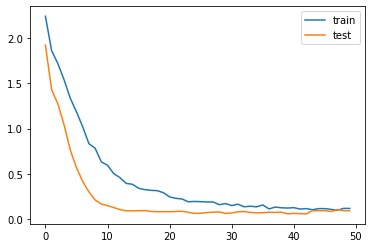

In [ ]:
# plot training history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

### Present the model performance

In [ ]:
import plotly.express as plotly

In [ ]:

score_cnn = model.evaluate(X_val, y_val)
print("%s: %.2f%%" % (model.metrics_names[1], score_cnn[1]*100))


prediction = model.predict_classes(X_val)

ground_truth = y_val

data = {
    'prediction': prediction,
    'ground_truth': ground_truth
    
}

data = pd.DataFrame(data)
# data.head(100)
plotly.scatter(data,x='prediction',y='ground_truth')








450/450 [==============================] - 0s 78us/step
acc: 97.33%


In [ ]:
data.head()

,prediction,ground_truth
1116,1,1
1368,0,0
422,2,2
413,2,2
451,0,0


# LSTM 

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers.embeddings import Embedding

In [ ]:
embed_dim = 200
lstm_out = 196
batch_size = 32


model = Sequential()
model.add(Embedding(5000, embed_dim,input_length = X_train.shape[1], dropout = 0.2))

model.add(MaxPooling1D(pool_size=2))
model.add(LSTM(100))
model.add(Dense(10,activation='softmax'))

print(model.summary())

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning:

The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.



Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 26, 200)           1000000   
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 13, 200)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 100)               120400    
_________________________________________________________________
dense_8 (Dense)              (None, 10)                1010      
Total params: 1,121,410
Trainable params: 1,121,410
Non-trainable params: 0
_________________________________________________________________
None


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

#Train with early stopping to avoid overfitting
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=128, 
                   )

Train on 1050 samples, validate on 450 samples
Epoch 1/50
1050/1050 [==============================] - 5s 5ms/step - loss: 2.1316 - acc: 0.3029 - val_loss: 1.7272 - val_acc: 0.3511
Epoch 2/50
1050/1050 [==============================] - 0s 381us/step - loss: 1.3686 - acc: 0.3629 - val_loss: 1.2229 - val_acc: 0.3400
Epoch 3/50
1050/1050 [==============================] - 0s 349us/step - loss: 1.2120 - acc: 0.3676 - val_loss: 1.2381 - val_acc: 0.3111
Epoch 4/50
1050/1050 [==============================] - 0s 352us/step - loss: 1.1904 - acc: 0.3752 - val_loss: 1.1863 - val_acc: 0.4578
Epoch 5/50
1050/1050 [==============================] - 0s 360us/step - loss: 1.1460 - acc: 0.5095 - val_loss: 1.1478 - val_acc: 0.5733
Epoch 6/50
1050/1050 [==============================] - 0s 358us/step - loss: 1.0942 - acc: 0.5457 - val_loss: 1.0684 - val_acc: 0.5689
Epoch 7/50
1050/1050 [==============================] - 0s 357us/step - loss: 1.0067 - acc: 0.5943 - val_loss: 0.9360 - val_acc: 0.6444
Epo

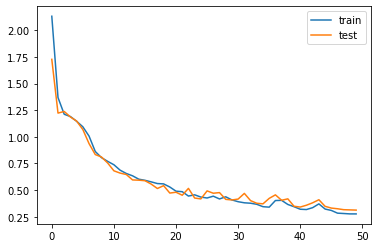

In [ ]:
# plot training history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
print('\n# TEST DATA #\n')
score_lstm = model.evaluate(X_val, y_val)
print("%s: %.2f%%" % (model.metrics_names[1], score_lstm[1]*100))
prediction = model.predict_classes(X_val)

ground_truth = y_val

data = {
    'prediction': prediction,
    'ground_truth': ground_truth
    
}

data = pd.DataFrame(data)
# data.head(100)
plotly.scatter(data,x='prediction',y='ground_truth')


# TEST DATA #

450/450 [==============================] - 0s 404us/step
acc: 88.67%


In [ ]:
data.head()

,prediction,ground_truth
1116,1,1
1368,0,0
422,2,2
413,2,2
451,0,0


# MLP

In [ ]:
model = Sequential()
model.add(layers.Dense(1024, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(10, activation='softmax'))

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# simple early stopping
from keras.callbacks import EarlyStopping

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1)

#Train with early stopping to avoid overfitting
history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=128, 
                   )

Train on 1050 samples, validate on 450 samples
Epoch 1/50
1050/1050 [==============================] - 0s 470us/step - loss: 1.6114 - acc: 0.7076 - val_loss: 0.8502 - val_acc: 0.9067
Epoch 2/50
1050/1050 [==============================] - 0s 42us/step - loss: 0.5683 - acc: 0.9333 - val_loss: 0.4044 - val_acc: 0.9333
Epoch 3/50
1050/1050 [==============================] - 0s 44us/step - loss: 0.2817 - acc: 0.9600 - val_loss: 0.2436 - val_acc: 0.9533
Epoch 4/50
1050/1050 [==============================] - 0s 56us/step - loss: 0.1630 - acc: 0.9733 - val_loss: 0.1586 - val_acc: 0.9711
Epoch 5/50
1050/1050 [==============================] - 0s 43us/step - loss: 0.1090 - acc: 0.9829 - val_loss: 0.1152 - val_acc: 0.9756
Epoch 6/50
1050/1050 [==============================] - 0s 49us/step - loss: 0.0824 - acc: 0.9905 - val_loss: 0.0890 - val_acc: 0.9756
Epoch 7/50
1050/1050 [==============================] - 0s 48us/step - loss: 0.0622 - acc: 0.9905 - val_loss: 0.0726 - val_acc: 0.9844
Epoch 8

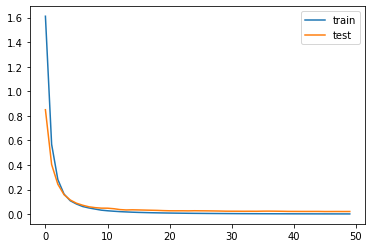

In [ ]:
# plot training history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
print('\n# TEST DATA #\n')
score_mlp = model.evaluate(X_val, y_val)
print("%s: %.2f%%" % (model.metrics_names[1], score_mlp[1]*100))
prediction = model.predict_classes(X_val)

ground_truth = y_val

data = {
    'prediction': prediction,
    'ground_truth': ground_truth
    
}

data = pd.DataFrame(data)
# data.head(100)
plotly.scatter(data,x='prediction',y='ground_truth')


# TEST DATA #

450/450 [==============================] - 0s 64us/step
acc: 99.11%


In [ ]:
data.head(100)

,prediction,ground_truth
1116,1,1
1368,0,0
422,2,2
413,2,2
451,0,0
...,...,...
479,0,0
426,2,2
123,2,2
1169,2,2


# RNN

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding

model = Sequential()

# Embedding layer
model.add(Embedding(5000, embed_dim,input_length = X_train.shape[1], dropout = 0.2))



# Recurrent layer
model.add(LSTM(64, return_sequences=False, 
               dropout=0.1, recurrent_dropout=0.1))

# Fully connected layer
model.add(Dense(64, activation='relu'))

# Dropout for regularization
model.add(Dropout(0.5))

# Output layer
model.add(Dense(10, activation='softmax'))



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: UserWarning:

The `dropout` argument is no longer support in `Embedding`. You can apply a `keras.layers.SpatialDropout1D` layer right after the `Embedding` layer to get the same behavior.



In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train,
                    y_train,
                    validation_data=(X_val, y_val),
                    epochs=50,
                    batch_size=128, 
                   )

Train on 1050 samples, validate on 450 samples
Epoch 1/50
1050/1050 [==============================] - 2s 2ms/step - loss: 2.2316 - acc: 0.2648 - val_loss: 2.0435 - val_acc: 0.3244
Epoch 2/50
1050/1050 [==============================] - 1s 709us/step - loss: 1.7823 - acc: 0.3143 - val_loss: 1.2640 - val_acc: 0.4178
Epoch 3/50
1050/1050 [==============================] - 1s 699us/step - loss: 1.4790 - acc: 0.3267 - val_loss: 1.2220 - val_acc: 0.4356
Epoch 4/50
1050/1050 [==============================] - 1s 705us/step - loss: 1.3547 - acc: 0.3514 - val_loss: 1.2152 - val_acc: 0.4400
Epoch 5/50
1050/1050 [==============================] - 1s 715us/step - loss: 1.3111 - acc: 0.3533 - val_loss: 1.2012 - val_acc: 0.4333
Epoch 6/50
1050/1050 [==============================] - 1s 696us/step - loss: 1.2826 - acc: 0.3514 - val_loss: 1.1734 - val_acc: 0.5467
Epoch 7/50
1050/1050 [==============================] - 1s 696us/step - loss: 1.2211 - acc: 0.4152 - val_loss: 1.1338 - val_acc: 0.5956
Epo

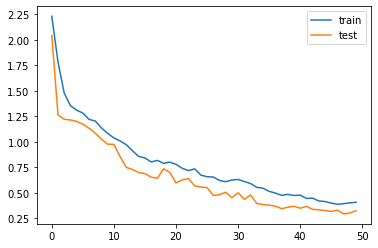

In [ ]:
# plot training history
from matplotlib import pyplot
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
print('\n# TEST DATA #\n')
score_rnn = model.evaluate(X_val, y_val)
print("%s: %.2f%%" % (model.metrics_names[1], score_rnn[1]*100))
prediction = model.predict_classes(X_val)

ground_truth = y_val

data = {
    'prediction': prediction,
    'ground_truth': ground_truth
    
}

data = pd.DataFrame(data)
# data.head(100)
plotly.scatter(data,x='prediction',y='ground_truth', color="ground_truth",
                 hover_name='prediction', log_x=True)


# TEST DATA #

450/450 [==============================] - 0s 787us/step
acc: 87.33%


In [ ]:
data.head(100)

,prediction,ground_truth
1116,1,1
1368,0,0
422,0,2
413,0,2
451,0,0
...,...,...
479,0,0
426,0,2
123,2,2
1169,2,2


# Results

In [ ]:
import plotly.graph_objects as go
x = ['cnn', 'lstm', 'mlp','Rnn']
y = [score_cnn[1],score_lstm[1],score_mlp[1],score_rnn[1]]

# Use textposition='auto' for direct text
fig = go.Figure(data=[go.Bar(
            x=x, y=y,
            text=y,
            textposition='auto',
          
            marker_color='lightsalmon',
         
        )])

fig.show()